# Modeling the Spread of a Disease
### SIR Model Basics
(Susceptible, Infected, Removed)
This model assumes 5 things:
1. At the instant the first infection begins, there is a population at risk of contracting the disease.
2. The disease spreads from infected (I) to susceptible (S) people.
3. After some time, people are no longer infected.
4. Once infected, people may never be infected again.
5. All other differences between people ignored.


The model will consist of a constant timestep ***dt*** with step intervals of order ***i***. This way, any time $t_{i} = i dt$

The model steps through from $t_{i}$ to $t_{i+1}$ and so we must use the values of $S(t_{i}), I(t_{i})$ and $R(t_{i})$ to predict values of $S(t_{i+1}), I(t_{i+1})$ and $R(t_{i+1})$. We therefore need 3 equations to fully describe this relationship.

In the most general sense, we can describe the three populations and their temporal behavior with "new value = old value + gains - losses".

To be specific, let's look at the susceptibles.

Assuming no new members are being added to the population, the number of ***Susceptibles*** will only decrease with time. In addition, if we assume each susceptible has an equal chance of meeting an ***Infected*** person, then the number of meetings (number of infections) will be proportional ***SI***. Then, the rate of infection is proportional to this, scaled by factor $\lambda$. So, the loss over a timestep *dt* is $\lambda$***SI dt***.

1. $S(t_{i+1}) = S(t_{i}) - \lambda S(t_{i})I(t_{i})dt$

For the Infected: the gains in this population are by neccesity equal to the losses from the susceptibles. The losses in this population is simply a constant probability of recovery per unit time. Let's say that out of the population $I(t_{i})$, there is some likelihood $\gamma$ that they recover (and of course are removed from the model as they cannot be infected again).

2. $I(t_{i+1}) = I(t_{i}) + \lambda S(t_{i})I(t_{i})dt - \gamma I(t_{i})dt$

And finally, the ***Removed***. Here, I guess we aren't considering how many people die? The only source of population removal here is the number of recovered from the Infected population.

3. $R(t_{i+1}) = R(t_{i}) + \gamma I(t_{i})dt$

So, our discrete SIR model consists of the equations 1, 2, and 3.

### Setting up the SIR function
I want something that will take in population data, perform the appropriate calculation to update the 3 individual populations, and then output the updated values

The most organized way to do this is to pass a 1x3 vector containing the poplation data into a single function.

In [3]:
function updateSIR(popnvector)
    # Need to parse through the input vector and assign the values to usable variables.
    susceptibles = popnvector[1]
    infecteds    = popnvector[2]
    removeds     = popnvector[3]
    
    # Perform the calculations detailed in equations 1, 2 and 3.
    newS = susceptibles - lambda*susceptibles*infecteds*dt
    newI = infecteds + lambda*susceptibles*infecteds*dt - gam*infecteds*dt
    newR = removeds + gam*infecteds*dt
    return [newS newI newR]
end

updateSIR (generic function with 1 method)

Let's do some testing to see if everything works properly. Given more time, I would ensure that in every failure case, the output is still helpful/meaningful.

In [19]:
# First, set the parameters that appear in the equation but remain constant throughout
dt = 0.5
lambda = 1/1200; gam = 1/10

# Then specify the input vector
s, i, r = 1000., 10, 20
vec = [s i r]
updateSIR(vec)

1×3 Array{Float64,2}:
 995.833  13.6667  20.5

## Loop Structure in Julia
Now, we want to update and output SIR data for some definite number of timesteps, in this case $T_{f} = 610$ days.

For a loop we would like to tell the structure how many loops we want it to do. On the surface, defining the number of steps as $n = T_{f}/dt$ should be fine. BUT we ***cannot*** expect the computer to do this calculation perfectly so that $ndt = T_{f}$. Essentially, we risk issuing an infinite loop if we rely on pure inequality like this. To get arround the issue, we can redefine our condition, or round our values of time.

In [20]:
tfinal = 610;
nsteps = round(Int64, tfinal/dt) # Ensures that nsteps is an integer.

resultvals = Array{Float64}(undef, nsteps+1, 3) #nsteps + 1 rows of 3 columns to hold all of the data.
timevec = Array{Float64}(undef, nsteps+1) # and the same for the time values

lambda = 1/20000
gam = 1/10
dt = 0.5

# Define initial values of S0, I0, R0 and assign them to the first row of resultvals
s0 = 1e4 ;
i0 = 4. ;
r0 = 0. ;
resultvals[1,:] = [s0, i0, r0]
timevec[1] = 0

# And execute the run.
for step = 1:nsteps
    resultvals[step+1, :] = updateSIR(resultvals[step, :])
    timevec[step+1] = timevec[step] + dt
end

In [21]:
using Plots
gr()

Plots.GRBackend()

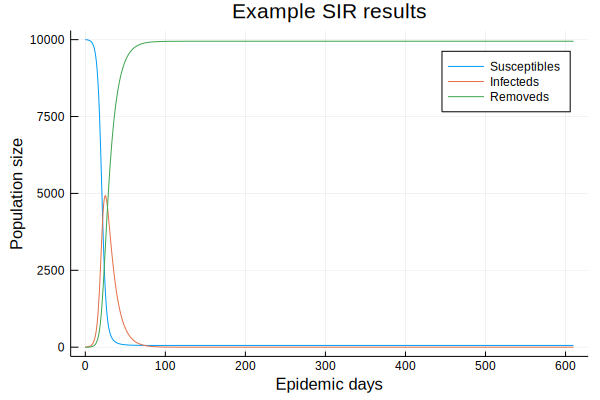

In [24]:
plot(timevec, resultvals,
    title  = "Example SIR results",
    xlabel = "Epidemic days",
    ylabel = "Population size",
    label  = ["Susceptibles" "Infecteds" "Removeds"]
)